# Project: Investigating National Happiness- [Gapminder]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This project will look at a nations average happiness score and compare this to a few variables. The happiness score of a nation is calculated by taking the average answer to the following: *''Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom the worst possible life for you. On which step of the lader would you say you personally feel you stand on at this time?* This is sometimes referred to as Cantril life ladder. Gapminder converted average happiness scores to a scale from 0 to 100 for easy comparison to percentage.

> The variables we will compare against are life expectancy in years, income, mobile phones per 100 people and percent of women in parliments. Each vaiable is tracked accross a number of years with data collected from multiple countries. Years are recorded as separate columns with another column for countries. 


### Dataset Sources 

> **Happiness**:<http://gapm.io/dhapiscore_whr>

> **Income**:<http://gapm.io/dgdppc>  
This is the gross domestic product per person adjusted for differences in purchasing power recorded in international dollars at the fixed 2011 prices, PPP based on 2011 ICP.

> **Life Expectancy**:<http://gapm.io/ilex>  
The average number of years a newborn child would live if current mortality rates stay the same.

> **Mobiles Per 100 People**:<https://data.worldbank.org/indicator/IT.CEL.SETS.P2>  
The indicator applies to all mobile celular subscriptions that offer voice communications.

> **Percent of Women in Parliments**:<http://gapm.io/dwparl>  
Percent of national parlimentary seats help by women this combines lower and upper houses.

> **Regions**:https://www.gapminder.org/fw/four-regions/ 
List of countries used by Gapminder with the region they fall into.


### Questions for Analysis
>**Question 1:** How has the average happiness score changed through the years? 

>**Quesiton 2:** In 2019 is there a correlation between a nations happiness score and the other variables we are looking at?

>**Quesiton 3:** Comparing the most recent data to 10 years ago, which countries happiness have improved the most and least?

In [59]:
# Start by importing the packages we will need.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
>We will start by looking at the data set with happiness scores. This is the main variable we will be working with so it makes sense to start here.



In [60]:
# Load and inspect data

happiness_df = pd.read_csv('happiness_score.csv')
happiness_df.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


> From just the first few rows of data here it looks like the first few years might have a lot of data missing. So let's take a further look.

In [61]:
#retrieve info about the happiness scoring data
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 16 columns):
country    163 non-null object
2005       27 non-null float64
2006       89 non-null float64
2007       101 non-null float64
2008       109 non-null float64
2009       113 non-null float64
2010       123 non-null float64
2011       145 non-null float64
2012       140 non-null float64
2013       135 non-null float64
2014       143 non-null float64
2015       141 non-null float64
2016       140 non-null float64
2017       146 non-null float64
2018       134 non-null float64
2019       151 non-null float64
dtypes: float64(15), object(1)
memory usage: 20.5+ KB


>The first couple of years in this dataset have a lot of missing data. There are 163 countries with data recorded but only 27 have scores recorded in 2005 and 89 recorded in 2006. So let's drop 2005 and 2006 from our analysis.

In [62]:
#remove the columns 2005 and 2006 from our data
happiness_df.drop(['2005','2006'],axis=1,inplace=True)

>Let's have another look at the first few rows of data we have to see what else might need addressing.

In [63]:
#Look at a sample of the data
happiness_df.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7


>Looking at Angola in this snippet of data, it only has happiness scores recorded for four years, this isn't enough data to make any conclusions from. So let's see if there are any other countries with limited data.

In [64]:
#Count the number of null values in the row
value_count = happiness_df.isnull().sum(axis=1) 
#Add this new column to our data, sorting it so the rows with the most null values are at the top
happiness_df_null_count = happiness_df.assign(value_count=value_count.values).sort_values(by=['value_count'],ascending=False)

#take a look at this data to see which countries have the most null values
happiness_df_null_count.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,value_count
35,Cuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
58,Guyana,59.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
93,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,12
114,Oman,NaN,NaN,NaN,NaN,68.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
136,Suriname,NaN,NaN,NaN,NaN,NaN,62.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


>There seems to be other countries that have a lot of missing data, Cuba has no data since we removed the first two years. So let's look at how many countries have missing data and how many missing values they have.

In [65]:
#See a breakdown of the number of countries with missing data and how many missing values they have
happiness_df_null_count.groupby(['value_count']).size()

value_count
0     62
1     30
2     23
3      7
4      6
5      7
6      5
7      5
8      6
9      3
10     3
11     1
12     4
13     1
dtype: int64

> It looks like most countries only have a couple of missing values. Let just look at countries where there are only a couple missing values and we can fill those in with averages. We can drop the other countries from our analysis.

In [66]:
#remove the rows that dont have at least 12 non null values i.e. only keep the rows that have at most 2 missing values
happiness_df.dropna(thresh=12,inplace=True)
happiness_df.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
2,Albania,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7
5,Armenia,48.8,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5,43.3,42.9,50.6,46.8


>Angola is no longer being included in the data so we know we've successfully dropped the data we wanted to. Next we will unpivot our data so we have three columns, country, year and happiness. This is so we can add in our other variables for analysis.

In [67]:
#unpivot the data so years are now in one column rather thana accross multiple columns
happiness_df_v2 = happiness_df.melt(id_vars=['country'], var_name='year', value_name='happiness')

#view a sample of the data now
happiness_df_v2.head()

,country,year,happiness
0,Afghanistan,2007,NaN
1,Albania,2007,46.3
2,United Arab Emirates,2007,NaN
3,Argentina,2007,60.7
4,Armenia,2007,48.8


>We still have some missing values, so let's fill those in with the mean happiness rating for that country.

In [68]:
#fill in the null values with the mean value of that country
happiness_df_v2['happiness'] = happiness_df_v2['happiness'].fillna(happiness_df_v2.groupby('country')['happiness'].transform('mean'))

#view a sample of the data
happiness_df_v2.head()

,country,year,happiness
0,Afghanistan,2007,36.091667
1,Albania,2007,46.300000
2,United Arab Emirates,2007,68.454545
3,Argentina,2007,60.700000
4,Armenia,2007,48.800000


>Now we are happy with how the data is looking let's do a final check and make sure all the missing values have been filled in and we are happy with the data types.

In [69]:
#take a look at an overview of the data
happiness_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 3 columns):
country      1495 non-null object
year         1495 non-null object
happiness    1495 non-null float64
dtypes: float64(1), object(2)
memory usage: 35.1+ KB


>We have a total of 1495 non-null values in each column and 1495 entries, so that is looking good now. The final change we need to make is converting the year from an object to a number, this will make ordering the years in graphs easier.

In [70]:
#change the type of the column year to an int
happiness_df_v2['year']=happiness_df_v2['year'].astype(int)

>We now have a complete dataset for happiness scores that we can work with. Next we will look at our other four datasets so they can be analysed along with happiness. We will start by looking at the dataset recording cell phones per 100 people. 

>Seen as our analysis is centred around how various indicators affect happiness, it makes sense to only look at data inside the 2007 to 2019 date range.

In [71]:
#read the csv file with the cell phone data, only brining in the relevant columns
phone_df = pd.read_csv('cell_phones_per_100_people.csv',usecols=['country','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])

#look at a sample of the data
phone_df.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,112.0,119.0,126.0,130.0,NaN,132.0,135.0,135.0,135.0,NaN,NaN,NaN,NaN
1,Afghanistan,17.2,28.5,37.0,35.0,45.8,49.2,52.1,55.2,57.3,61.1,65.9,59.1,59.4
2,Angola,23.7,31.2,36.0,40.3,49.8,50.9,51.1,52.2,49.8,45.1,44.7,43.1,46.6
3,Albania,76.5,61.9,82.9,91.3,106.0,120.0,127.0,116.0,118.0,117.0,126.0,94.2,91.3
4,Andorra,76.8,76.6,76.4,77.6,77.7,77.5,79.1,83.6,91.4,98.5,104.0,107.0,114.0


>It looks like there could be some missing values, let's start by seeing if there are any countries with too many missing values to work with.

In [72]:
#countt the number of null values in each row
value_count = phone_df.isnull().sum(axis=1)
#add this column to the dataset and sort so the countries with the most missing data are at the top
phone_df_null_count = phone_df.assign(value_count=value_count.values).sort_values(by=['value_count'],ascending=False)

#take a look at a sample of this data
phone_df_null_count.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,value_count
78,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
206,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
130,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
185,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
8,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13


>These countries don't have any data at all. So like we did with the other data set, let's remove countries with any more than just a couple values missing.

In [73]:
#remove the rows that dont have at least 12 non null values i.e. only keep the rows that have at most 2 missing values
phone_df.dropna(thresh=12,inplace=True)
phone_df.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Afghanistan,17.2,28.5,37.0,35.0,45.8,49.2,52.1,55.2,57.3,61.1,65.9,59.1,59.4
2,Angola,23.7,31.2,36.0,40.3,49.8,50.9,51.1,52.2,49.8,45.1,44.7,43.1,46.6
3,Albania,76.5,61.9,82.9,91.3,106.0,120.0,127.0,116.0,118.0,117.0,126.0,94.2,91.3
4,Andorra,76.8,76.6,76.4,77.6,77.7,77.5,79.1,83.6,91.4,98.5,104.0,107.0,114.0
5,United Arab Emirates,125.0,132.0,135.0,128.0,131.0,151.0,175.0,183.0,194.0,213.0,209.0,209.0,201.0


>Next we will unpivot the dataset so it matches the happiness score data and we can easily combine them into one table.

In [74]:
#unpivot the data so the years are in their own column
phone_df_v2 = phone_df.melt(id_vars=['country'], var_name='year', value_name='phones_per_100_people')

#look at a summary of the new data
phone_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 3 columns):
country                  2561 non-null object
year                     2561 non-null object
phones_per_100_people    2513 non-null float64
dtypes: float64(1), object(2)
memory usage: 60.1+ KB


>Where we kept countries with a couple of missing data points we will again fill them in with the mean value of that country.

In [75]:
#fill in any missing data with the mean value for that country
phone_df_v2['phones_per_100_people'] = phone_df_v2['phones_per_100_people'].fillna(phone_df_v2.groupby('country')['phones_per_100_people'].transform('mean'))

#look at a summary of the data
phone_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 3 columns):
country                  2561 non-null object
year                     2561 non-null object
phones_per_100_people    2561 non-null float64
dtypes: float64(1), object(2)
memory usage: 60.1+ KB


>Lastly, like we did for the previous dataset, we will convert the year to an int.

In [76]:
#change the type of the year to an int
phone_df_v2['year']=phone_df_v2['year'].astype(int)

>The same process was followed to clean the other datasets, which we can now pull in and combine together so we are left with one complete dataset in a dataframe. We can also add in the regions of each country.

In [77]:
#read all the csv files we want to bring in and create a dataframe for each
income_df = pd.read_csv('income_clean_df.csv')
life_expectancy_df = pd.read_csv('life_expectancy_clean.csv')
women_in_parliment_df = pd.read_csv('women_in_parliment_clean.csv')
regions_df = pd.read_csv('Data Geographies - by Gapminder.csv', usecols=['name','four_regions'])
#rename the name column in regions_df to country to match the other dataframes
regions_df.rename(columns={'name': 'country'},inplace=True)


**********************************************************************************************************************************************

In [78]:
#define a function that will merge the tables as we want
def merge_function(df1, df2):
    df_merged = df1.merge(df2, left_on=['country','year'], right_on=['country','year'], how='left')
    return df_merged

#use that function to combine the data, and also combine the region data
df_combined_v1 = merge_function(happiness_df_v2, phone_df_v2)
df_combined_v2 = merge_function(df_combined_v1, income_df)
df_combined_v3 = merge_function(df_combined_v2, life_expectancy_df)
df_combined_v4 = merge_function(df_combined_v3, women_in_parliment_df)
df_combined_final = df_combined_v4.merge(regions_df, left_on=['country'], right_on=['country'], how='left')

#output a sample of the data
df_combined_final.head()

,country,year,happiness,phones_per_100_people,income,life_expectancy,women_in_parliment,four_regions
0,Afghanistan,2007,36.091667,17.2,1460,58.5,26.6,asia
1,Albania,2007,46.300000,76.5,9180,77.5,11.8,europe
2,United Arab Emirates,2007,68.454545,125.0,76.6k,70.0,5.0,asia
3,Argentina,2007,60.700000,102.0,22.4k,75.3,39.8,americas
4,Armenia,2007,48.800000,64.0,9710,73.5,9.2,europe


>Now our data is all in one set let's have a final check to see if we are ready to start our analysis.

In [79]:
#take a look at a summary of the data
df_combined_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 1494
Data columns (total 8 columns):
country                  1495 non-null object
year                     1495 non-null int64
happiness                1495 non-null float64
phones_per_100_people    1482 non-null float64
income                   1495 non-null object
life_expectancy          1495 non-null float64
women_in_parliment       1404 non-null float64
four_regions             1495 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 105.1+ KB


> We can see that the data type for income needs addressing because at the moment it's an object rather than a float. We can see from the small section of the data above that this is caused because of numerized data e.g. the income in UAE is recorded as 76.6k rather than 76600. So let's address this.

In [80]:
#change the type of the income column to a float, and everytime a 'k' has been used replace this will *1000 to get the actual number
df_combined_final['income'] = df_combined_final['income'].replace({'k': '*1000'}, regex=True).map(pd.eval).astype(float)

#look at a summary of the data
df_combined_final.head()

,country,year,happiness,phones_per_100_people,income,life_expectancy,women_in_parliment,four_regions
0,Afghanistan,2007,36.091667,17.2,1460.0,58.5,26.6,asia
1,Albania,2007,46.300000,76.5,9180.0,77.5,11.8,europe
2,United Arab Emirates,2007,68.454545,125.0,76600.0,70.0,5.0,asia
3,Argentina,2007,60.700000,102.0,22400.0,75.3,39.8,americas
4,Armenia,2007,48.800000,64.0,9710.0,73.5,9.2,europe


>We can also see from the information above that there are some countries that have a complete set of happiness scores but do not have the number of phones per 100 people or the percent of women in parliment recorded. For the sake of completeness, let's drop any rows where there is missing data.

In [81]:
#remove any rows that don't have at least 8 values recorded, i.e. any rows that ahve a null value
df_combined_final.dropna(thresh=8,inplace=True)
df_combined_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1494
Data columns (total 8 columns):
country                  1404 non-null object
year                     1404 non-null int64
happiness                1404 non-null float64
phones_per_100_people    1404 non-null float64
income                   1404 non-null float64
life_expectancy          1404 non-null float64
women_in_parliment       1404 non-null float64
four_regions             1404 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 98.7+ KB


>Our data is complete!

>To make coding in the analysis easier let's rename our finished dataframe. Let's also create two data frames that filter out the data for 2009 and 2019 to answer question 3 of our analysis

In [82]:
#remane the dataframe
df = df_combined_final

In [83]:
#create a dataframe with just the 2019 data
df_2019 = df.query('year == 2019')

In [84]:
#create a dataframe with just the 2009 data
df_2009 = df.query('year == 2009')

<a id='eda'></a>
## Exploratory Data Analysis


### How has the average happiness score changed through the years?

> Let start by just looking at a histagram for happiness scores in 2009 compared to 2019.

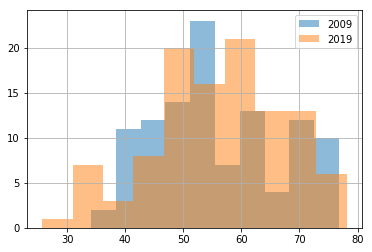

In [85]:
#plot a histagram for happiness scores in 2009 and 2019 and add in a legend
df_2009['happiness'].hist(alpha=0.5, label='2009')
df_2019['happiness'].hist(alpha=0.5, label='2019')
plt.legend();

>In 2009 there is a discinct peak at 50 to 55 percent happiness scorings. In 2019 the graph becomes more skewed to the right which could indicate people became happier. Let's take a look at a line graph to show ow the average happiness accross the world has changed over time. 

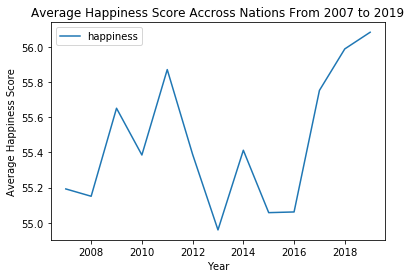

In [86]:
#plot a line graph by plotting the years along the x axis and the mean of the happiness
df.groupby('year').mean().plot(y='happiness', kind = 'line')

#give the graph a title and the x and y axis labels
plt.title('Average Happiness Score Accross Nations From 2007 to 2019')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score');

>The average happiness score across all countries has jumped around year on year. However since 2016, the happiness score has consistently increased. It could be interesting to break this down further and look at the happiness score year on year for each region of the world.

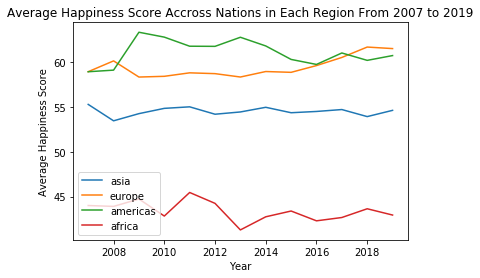

In [87]:
#create a line graph using a for loop to plot a line for each region
fig, ax = plt.subplots()

for name in ['asia','europe','americas','africa']:
    df[df.four_regions==name].groupby('year').mean().plot(y='happiness', kind = 'line', ax=ax,label=name)
    #give the graph a title and the x and y axis labels
    plt.title('Average Happiness Score Accross Nations in Each Region From 2007 to 2019')
    plt.xlabel('Year')
    plt.ylabel('Average Happiness Score');
    


>We can see all regions have stayed fairly consistant in their happiness scores across the years. Africa and Asia consistantly score lower than Europe and Americas. Americas and Europe have scored similarly overall however since 2015 Europe's score has been increasing whereas America's score has jumped around.

## In 2019 there a correlation between a nations happiness score and the other variables we are looking at?

>To anser this question it makes sense to plot some scatter plots comparing happiness to the other variables.

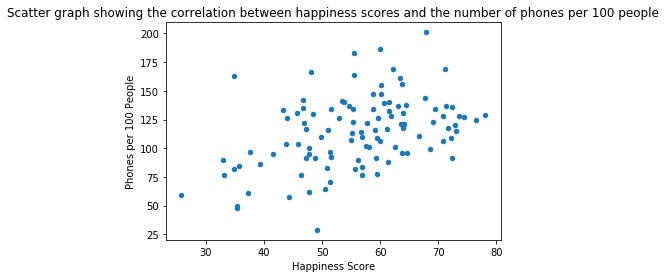

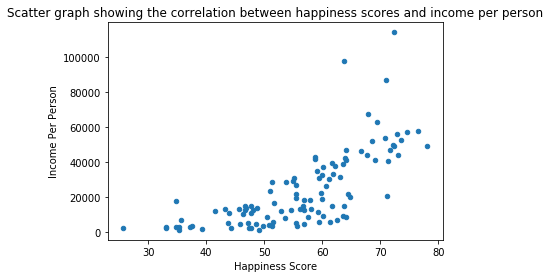

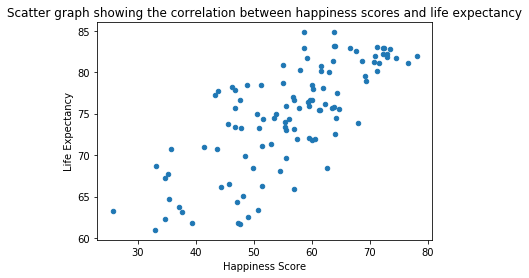

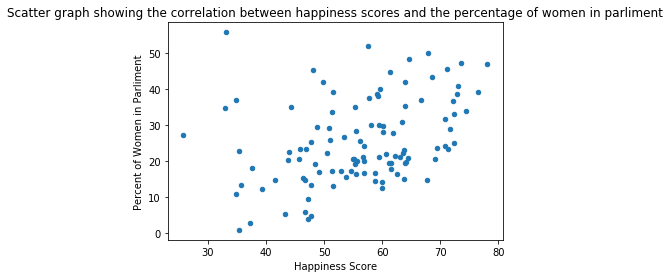

In [88]:
#create a function to create a scatter graph where the inputs are the variable being compared to happiness, the title of the graph and the label on the y axis

def graph_plot_function(variable,title_end, y_label):
    df_2019.plot(x='happiness', y=variable,kind='scatter');
    plt.title('Scatter graph showing the correlation between happiness scores and {}'.format(title_end))
    plt.xlabel('Happiness Score')
    plt.ylabel(y_label)
    

graph_plot_function('phones_per_100_people','the number of phones per 100 people', 'Phones per 100 People')
graph_plot_function('income','income per person', 'Income Per Person')
graph_plot_function('life_expectancy','life expectancy', 'Life Expectancy')
graph_plot_function('women_in_parliment','the percentage of women in parliment', 'Percent of Women in Parliment')

>There seems to be a positive correlation between all our variables and the happiness of the countries. Income seems to show the strongest correlation with happiness, with a few outliers. Life expectancy has a fairly strong correlation with happiness. While percent of women in parliment and phones per 100 people show a positive correlation, it's not a stong one, both showing quite a few outliers.

### Comparing the most recent data to 10 years ago, which countries happiness have improved the most and least?

>We already have a dataframe with data from 2009 and one one from 2019. But to see the increase or decrease in happiness scores we need to merge these dataframes together.

In [89]:
#merge the dataframes with teh 2019 data and the 2009 data so we have one dataframe with the years we are interested in
df_2009_2019 = pd.merge(df_2009[['country','happiness']],df_2019[['country','happiness']], left_on=['country'], right_on=['country'], how='left')

#look at a sample of that data
df_2009_2019.head()

,country,happiness_x,happiness_y
0,Afghanistan,44.0,25.7
1,Albania,54.9,48.8
2,United Arab Emirates,68.7,67.9
3,Argentina,64.2,59.7
4,Armenia,41.8,46.8


>Next we need to rename happiness_x and happiness_y with more meaningful labels. We will then add in a new column that shows the change from 2009 to 2019 for each country, calling this happiness_change. Finally, so we can use idxmax() and idxmim(), we will make the country the index column.

In [90]:
#rename the columns to something more meaningful
df_2009_2019=df_2009_2019.rename(columns={'happiness_x':'happiness_2009','happiness_y':'happiness_2019'})
#create a new column with the difference between happiness scores in 2009 and 2019
df_2009_2019['happiness_change']=df_2009_2019['happiness_2019']-df_2009_2019['happiness_2009']
#make the country column the index
df_2009_2019.set_index('country',inplace=True)

#take a look at a sample of the data
df_2009_2019.head()


,happiness_2009,happiness_2019,happiness_change
country,,,
Afghanistan,44.0,25.7,-18.3
Albania,54.9,48.8,-6.1
United Arab Emirates,68.7,67.9,-0.8
Argentina,64.2,59.7,-4.5
Armenia,41.8,46.8,5.0


>Now we have the data in the correct format, let's see which countries experienced the biggest increase and biggest decrease in happiness scores. 

In [91]:
#use idmax to to calculate the country with the biggest increase in happiness
biggest_increase = df_2009_2019.happiness_change.idxmax()
#calculate what the  increase was
increase=df_2009_2019['happiness_change'].max()

#output an explaination of the data above in a readable format
print('{} had the biggest increase in happiness scoring, with an increase of {}.'.format(biggest_increase,increase))

Serbia had the biggest increase in happiness scoring, with an increase of 14.0.


In [92]:
#use idmin to to calculate the country with the biggest increase in happiness
least_increase = df_2009_2019.happiness_change.idxmin()
#calculate what the decrease was
decrease=df_2009_2019['happiness_change'].min()

#output an explaination of the data above in a readable format
print('{} had the lowest increase in happiness scoring, with a decrease of {}.'.format(least_increase,decrease))

Venezuela had the lowest increase in happiness scoring, with a decrease of -21.400000000000006.


>Serbia had the biggest increase and Venezuela had the biggest decrease in happiness scoring. It might be interesting to plot these on a line graph to see how each countries scoring has changed over time.

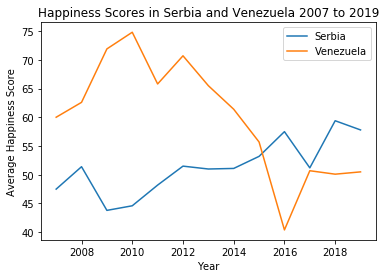

In [93]:
#create a line graph using a for loop to plot a line for the countries we are interested in
fig, ax = plt.subplots()

for name in ['Serbia','Venezuela']:
    df[df.country==name].groupby('year').mean().plot(y='happiness', kind = 'line', ax=ax,label=name)
    #give the graph a title and the x and y axis labels
    plt.title('Happiness Scores in Serbia and Venezuela 2007 to 2019')
    plt.xlabel('Year')
    plt.ylabel('Average Happiness Score');

>We can see that Venezuela experienced a big decrease in happiness between 2012 and 2016 whereas Serbia experiences a steady increase between 2009 and 2016.

<a id='conclusions'></a>
## Conclusions

### Results

>In conclusion, on average accross the world, since 2016 there has been an increase in happiness. However before then the average happiness has jumped around. A larger range of years in our data set would help to see if there have previously been any trends in happiness and if moving forward happiness scorings continue to rise. There is a clear difference in happiness scoring between regions of the world, with Africa consistantly scoring lower than other regions. We could have broken this down further to see if there were any trends between smaller regions of the world. 

>There was a positive correlation between all our variables and the happiness of the countries. With income and life expectancy showing the strongest correlation and women in parliment and phones per 100 people showing a weaker correlation. We could have calaculated the correlation coefficients to more accurately see how strong the relationship was between variables.

>Serbia had the biggest increase in happiness scoring, with an increase of 14.0 and Venezuela had the biggest decrease in happiness scoring, with a decrease of -21.4. However we did drop data from quite a few countries when creating our dataframe so we could have missed off a country that had a bigger change in happiness. Rather than dropping countries from the data set that had missing data we could have done more to calculate an approximate for the value.

### Limitations
>We only had data from 2007 to 2019, data that goes further back in history would have helped to spot and longer term trends.

>We only had four regions we could investicate, more regions could have been used to see if there were any trends in different parts of the world.

>Instead of dropping any missing data we could have done more to calculate an apporximate for the value.

>Where we filled in missing values with mean of the value for that country, we could have used other variables to calculate a better estimate.


In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0